# 0.0 Imports

In [1]:
from sklearn import model_selection as ms
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from six import StringIO
from matplotlib import pyplot as plt

import cv2

import numpy as np

# 1.0 Load dataset

In [2]:
X, y = ds.make_regression(n_features=4, random_state=0) # por padrão essa função retorna um dataset com 100 amostras

In [3]:
X.shape

(100, 4)

In [5]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
X_train.shape

(80, 4)

# 2.0 Train Decision Tree Regressor

In [7]:
# definition
model = tr.DecisionTreeRegressor(random_state=0)

# training
model.fit(X_train, y_train)

# performance
y_pred = model.predict(X_test)

In [8]:
y_pred

array([ 230.70774239,  -26.14767708, -112.02609264,    1.58487072,
         58.17002978,  -51.31640586,  -82.1638625 ,   48.23606401,
       -232.83534468, -293.24954525,  136.72504312, -149.1655967 ,
       -129.90498267,  -64.62792903,  -82.1638625 ,   91.82363042,
        103.28994217, -219.83343312,  105.16466554,  -63.09051586])

In [9]:
mse = mt.mean_squared_error(y_test, y_pred)
mse

4409.734584895946

In [10]:
rmse = np.sqrt(mse)
rmse

66.40583246143328

In [11]:
# Export
dot_data = StringIO()  # string IO é uma classe que permite manipular arquivos do tipo dot

tr.export_graphviz(
    model,                     # modelo treinado da arvore
    out_file='tree_reg.dot',   # nome do arquivo de saída
    rounded=True,              # valores dentro da folha possuem número redondos
    filled=True                # 
)


In [12]:
# convertendo o arquivo dot
!dot -Tpng tree_reg.dot -o tree_reg.png

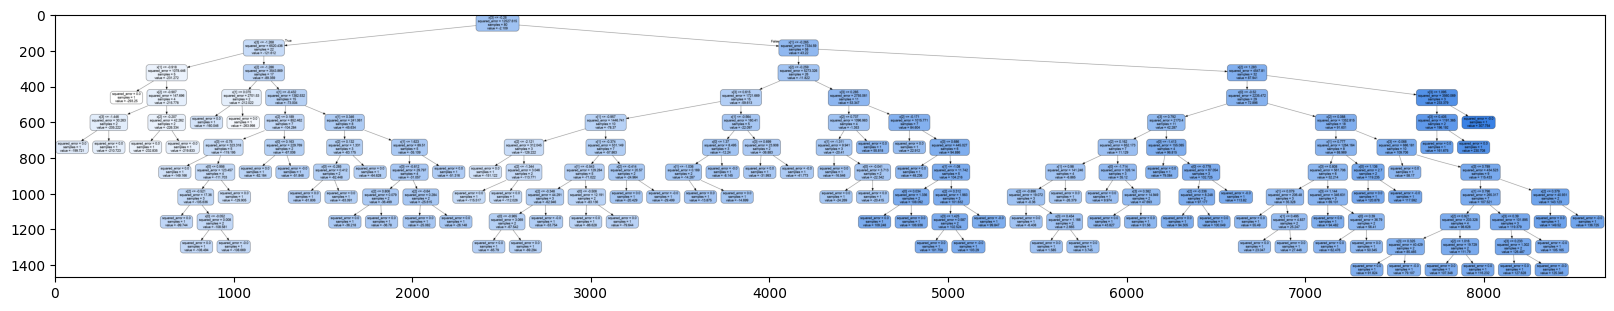

In [13]:
# cv2 é um modulo que permite processar imagens e vídeos no python
img = cv2.imread('tree_reg.png')  # carrega a imagem 'tree_reg.png'
plt.figure(figsize=(20, 20))      # cria um frame para colocarmos a imagem carregada

plt.imshow(img)   # coloca a imagem no figure criado

Controlando o crescimento da árvore de decisão:

MSE = 10370.476391863536
MSE = 101.83553599733021


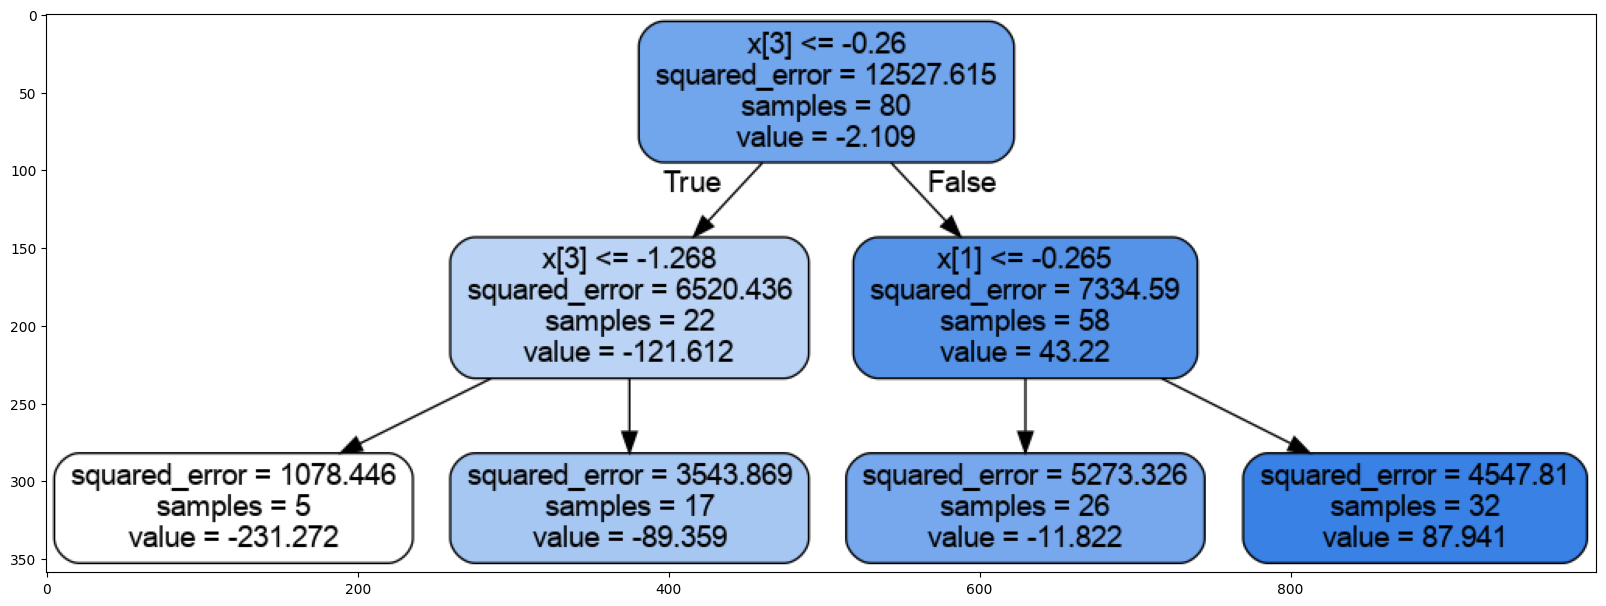

In [14]:
# definition
model = tr.DecisionTreeRegressor(max_depth=2, random_state=0)

# training
model.fit(X_train, y_train)

# performance
y_pred = model.predict(X_test)

mse = mt.mean_squared_error(y_test, y_pred)
print(f'MSE = {mse}')

rmse = np.sqrt(mse)
print(f'MSE = {rmse}')


# Export
dot_data = StringIO()

tr.export_graphviz(
    model,
    out_file='tree_reg.dot',
    rounded=True,
    filled=True
)


# convertendo o arquivo dot
!dot -Tpng tree_reg.dot -o tree_reg.png


# cv2 é um modulo que permite processar imagens e vídeos no python
img = cv2.imread('tree_reg.png')
plt.figure(figsize=(20, 20))

plt.imshow(img)

A imagem nos retorna a representação da árvore com 4 informações em cada nó:
    
    1. Splitting Critéria: critério utilizado para criar uma subdivisão.
    2. squared_error: erro quadrático.
    3. samples: número de registros em cada nó.
    4. value: valor médio da variável target dentro de cada nó (valor previsto pelo algoritmo).
    
squred_error = $\sum{(y-\bar{y})^2} / N_{samples}$

In [56]:
# dentro do primeiro nó

squared_error = np.sum((y_train - y_train.mean())**2) / y_train.shape[0]
predicted_value = y_train.mean()

print('First Node \n')
print(f'squared_error:\t {squared_error:.3f}')
print(f'samples:\t {y_train.shape[0]}')
print(f'value:\t\t {predicted_value:.3f}')


First Node 

squared_error:	 12527.615
samples:	 80
value:		 -2.109


In [58]:
# depois do primeiro split


split_criteria = X_train[:,3] <= -0.26    # criterio de divisão do primeiro nó
y_splited = y_train[split_criteria]       # valores da variavel target que satisfazem a condicao (X[3] <= 0.26)


squared_error = np.sum((y_splited - y_splited.mean())**2) / y_splited.shape[0]
predicted_value = y_splited.mean()

print('Second Node -> Splitting Criteria == True \n')
print(f'squared_error:\t {squared_error:.3f}')
print(f'samples:\t {y_splited.shape[0]}')
print(f'value:\t\t {predicted_value:.3f}')


Second Node -> Splitting Criteria == True 

squared_error:	 6520.436
samples:	 22
value:		 -121.612


# 3.0 Variando os Parâmetros da Decision Tree Regressor 

## `max_depth`

Primeiro vamos entender como varia a performance da nossa árvore quando variamos a sua profundidade máxima `max_depth` 

In [62]:
max_depth_values = np.arange(2, 25, 1)
rmse_list = []

for i in max_depth_values:
    
    # definition
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=0)
    
    # training
    model.fit(X_train, y_train)
    
    # performance
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mt.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

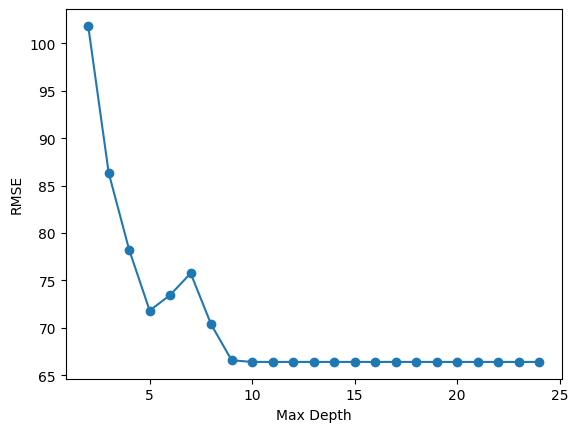

In [65]:
plt.plot(max_depth_values, rmse_list, marker='o')

plt.xlabel('Max Depth')
plt.ylabel('RMSE')

In [66]:
X.shape

(100, 4)

Incialmente o nosso modelo foi treinado em um dataset com dataset com 100 amostras, um único considerado muito pequeno para treinar e utilizar algoritmos de machine learning. Vamos agora criar um conjunto de dados com um número maior de registros e comparar para vermos se obteremos um modelo melhor.

In [68]:
X, y = ds.make_regression(n_samples=20_000, n_features=4, random_state=0)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
X_train.shape

(16000, 4)

Nosso algoritmo será treinado agora com 16000 pontos.

In [70]:
max_depth_values = np.arange(2, 25, 1)
rmse_list = []

for i in max_depth_values:
    
    # definition
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=0)
    
    # training
    model.fit(X_train, y_train)
    
    # performance
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mt.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

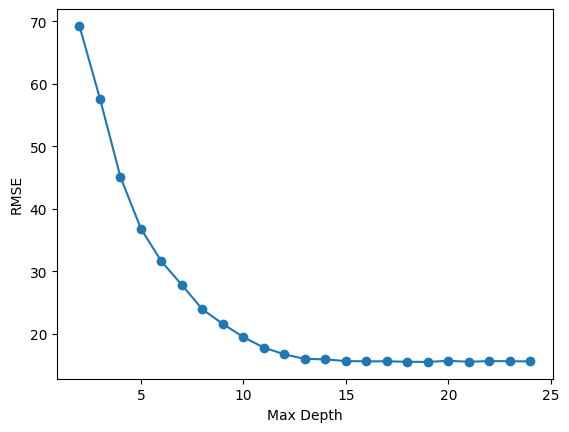

In [71]:
plt.plot(max_depth_values, rmse_list, marker='o')

plt.xlabel('Max Depth')
plt.ylabel('RMSE')

Ajustando o modelo com o split de validação.

In [111]:
X, y = ds.make_regression(n_samples=20_000, n_features=4, random_state=0)

# Train Test split
X, X_test, y, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

# Train Validation Split
X_train, X_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
max_depth_values = np.arange(2, 25, 1)
rmse_list = []

for i in max_depth_values:
    
    # definition
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=0)
    
    # training
    model.fit(X_train, y_train)
    
    # performance
    yhat_val = model.predict(X_val)
    
    rmse = np.sqrt(mt.mean_squared_error(y_val, yhat_val))
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

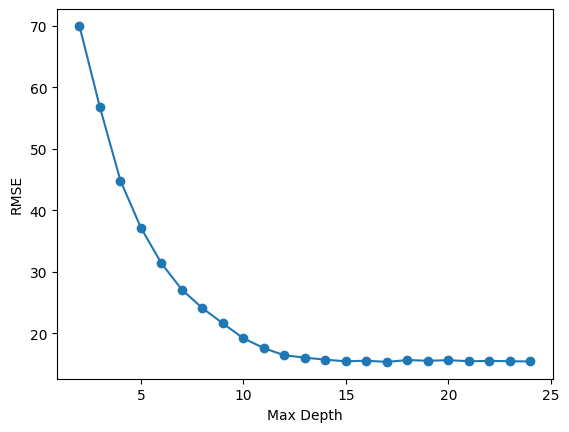

In [100]:
plt.plot(max_depth_values, rmse_list, marker='o')

plt.xlabel('Max Depth')
plt.ylabel('RMSE')

In [102]:
rmse_list

[69.97799435194295,
 56.7362272298744,
 44.83450904821403,
 37.1585718366828,
 31.382500082775522,
 27.09522464214008,
 24.103923489175095,
 21.615880777192267,
 19.186172065518164,
 17.60548290800596,
 16.422555018061015,
 16.059200653846965,
 15.716353838235056,
 15.454958916603655,
 15.553466767674607,
 15.354357976271954,
 15.6617569802466,
 15.54235925115558,
 15.640514639837956,
 15.467652172378347,
 15.517400528136285,
 15.466758954526506,
 15.431523316484082]

## `min_samples_split (default=2)`

O parâmetro `min_samples_split` é usado para indicar ao modelo o número minímos de amostras que um nó precisa ter de modo que a gerar um novo split. Por padrão o seu valor é igual a 2, ou seja, se um nós tiver dois pontos ou mais, um novo split vai ser realizado a não ser que não tenhamos definido outro critério de parada.

In [103]:
# definition
model = tr.DecisionTreeRegressor(min_samples_split=3000, random_state=0)

# training
model.fit(X_train, y_train)

# performance
yhat_val = model.predict(X_val)

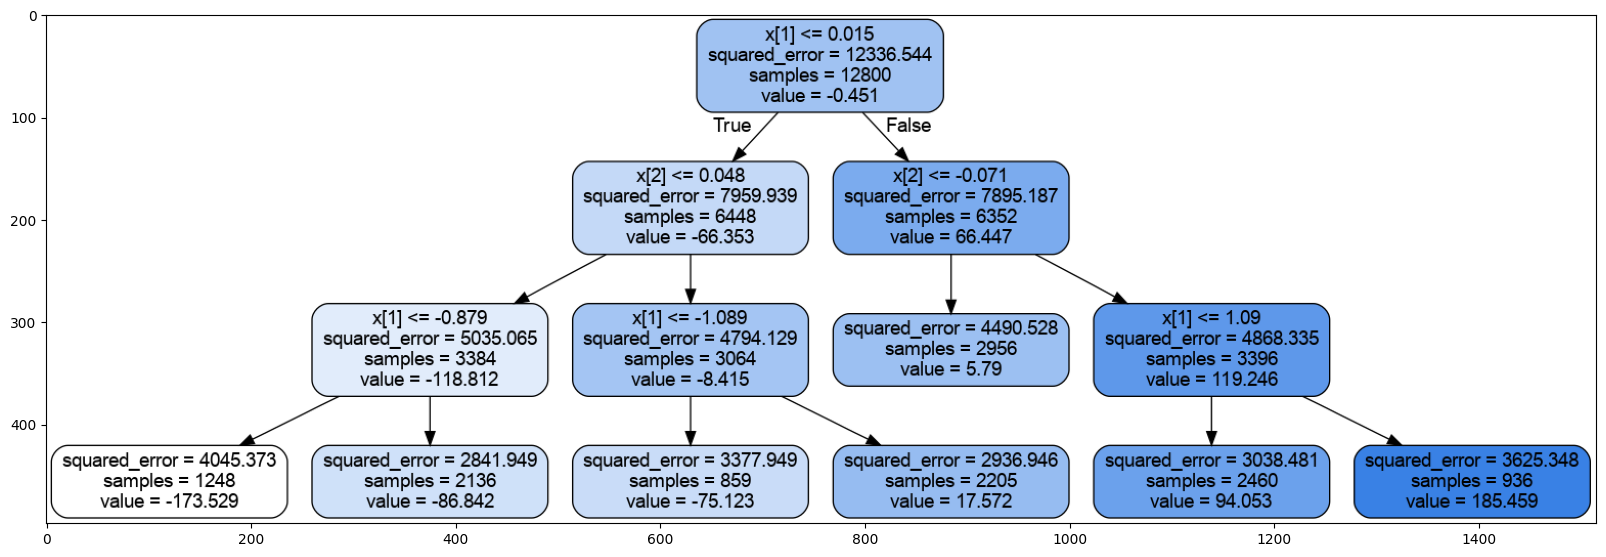

In [104]:
# Export
tr.export_graphviz(
    model,
    out_file='tree_reg.dot',
    rounded=True,
    filled=True
)


# convertendo o arquivo dot
!dot -Tpng tree_reg.dot -o tree_reg.png


# cv2 é um modulo que permite processar imagens e vídeos no python
img = cv2.imread('tree_reg.png')
plt.figure(figsize=(20, 20))

plt.imshow(img)

Após o terceiro split, todos os nós resultantes possuem menos de 3000 samples, portanto a árvore não crescou a partir do terceiro split.

## `min_impurity_decrease (default=0.0)`

O parâmetro `min_impurity_decrease` informa ao algoritmo a menor queda de impureza necessária para um novo split ser feito. Ao aumentar o seu valor, estaremos aumentando a exigência necessária para um split ser feito, portanto é uma ferramenta para diminuirmos o overfit. 

In [120]:
min_impurity_decrease_values = np.arange(0.1, 600, 10)
rmse_list = []

for i in min_impurity_decrease_values:
    
    # definition
    model = tr.DecisionTreeRegressor(min_impurity_decrease=i, random_state=0)
    
    # training
    model.fit(X_train, y_train)
    
    # performance
    yhat_val = model.predict(X_val)
    
    rmse = np.sqrt(mt.mean_squared_error(y_val, yhat_val))
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

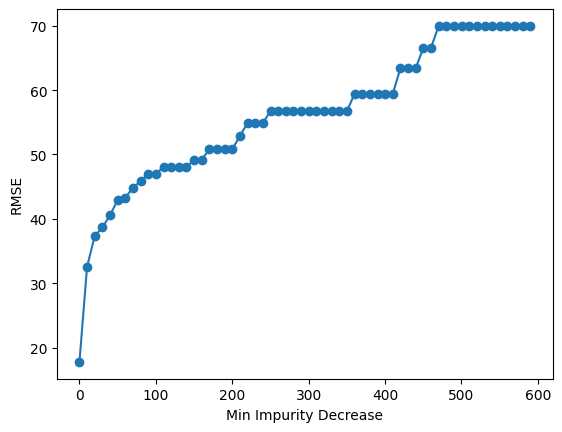

In [121]:
plt.plot(min_impurity_decrease_values, rmse_list, marker='o')

plt.xlabel('Min Impurity Decrease')
plt.ylabel('RMSE')

Percebemos que conforme aumentamos o valor de `min_impurity_decrease` o valor do RMSE aumenta, pois conforme `min_impurity_decrease` aumenta passamos a aceitar subconjuntos com menor grau de impureza de modo que o erro cometido passa a aumentar.

Vamos desenhar uma decision tree com um valor alto de `min_impurity_decrease` para ver ela se comporta.

In [122]:
# definition
model = tr.DecisionTreeRegressor(min_impurity_decrease=300, random_state=0)

# training
model.fit(X_train, y_train)

# performance
yhat_val = model.predict(X_val)

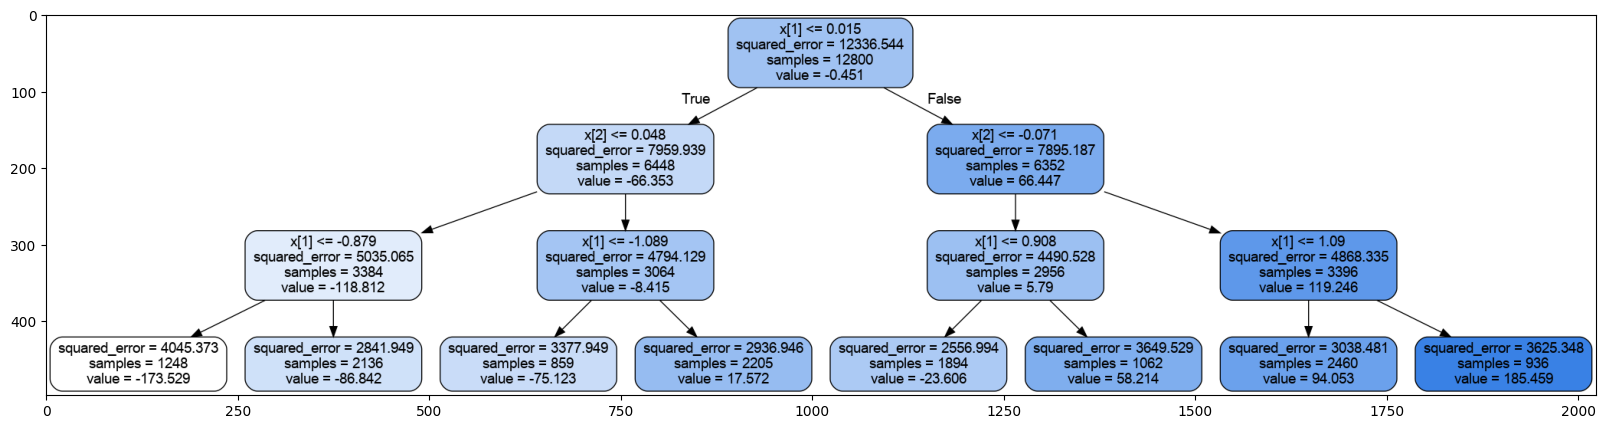

In [123]:
# Export
tr.export_graphviz(
    model,
    out_file='tree_reg.dot',
    rounded=True,
    filled=True
)


# convertendo o arquivo dot
!dot -Tpng tree_reg.dot -o tree_reg.png


# cv2 é um modulo que permite processar imagens e vídeos no python
img = cv2.imread('tree_reg.png')
plt.figure(figsize=(20, 20))

plt.imshow(img)

No nosso exemplo a árvore só continuará crescendo se a diferença entre o RMSE entre dois nós for maior 300.

**O split acontece se:** 

$RMSE_{\;before} - RMSE_{\;after} > 300$

A árvore parou no quarto nível por que nenhum dos nós desse nível consegue reduzir o $RMSE$ em mais de 300 para o próximo nível.